In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/loan-prediction/train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.drop('Loan_ID',axis=1,inplace=True)

In [9]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [10]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [18]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Married']=df['Married'].map({'No':0,'Yes':1})
df['Education']=df['Education'].map({'Graduate':0,'Not Graduate':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


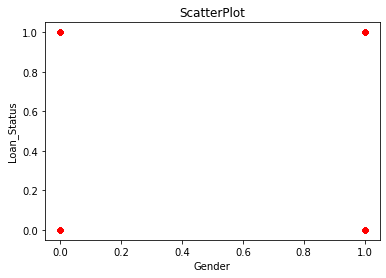

In [20]:

# scatter plot
df.plot(kind = 'scatter',
        x = 'Gender',
        y = 'Loan_Status',
        color = 'red')
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

In [21]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


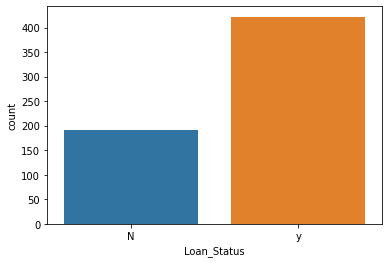

In [22]:
# visualize the target variable
g = sns.countplot(df['Loan_Status'])
g.set_xticklabels(['N','y'])
plt.show()

In [23]:
y=df['Loan_Status']
X=df.drop('Loan_Status',axis=1)

In [24]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1
610,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0


In [25]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, 
X1,y1 = ros.fit_resample(X, y)

#print('Original dataset shape', df(y))
#print('Resample dataset shape', df(y_ros))

In [27]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [28]:
X1.shape

(844, 11)

In [29]:
y1.shape

(844,)

In [30]:
df.shape

(614, 12)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def accuracy(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return y_test, predict

In [32]:
X1['Dependents'].unique()

array([0, 1, 2, 3])

In [33]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             844 non-null    int64  
 1   Married            844 non-null    int64  
 2   Dependents         844 non-null    int64  
 3   Education          844 non-null    int64  
 4   Self_Employed      844 non-null    int64  
 5   ApplicantIncome    844 non-null    int64  
 6   CoapplicantIncome  844 non-null    float64
 7   LoanAmount         844 non-null    float64
 8   Loan_Amount_Term   844 non-null    float64
 9   Credit_History     844 non-null    float64
 10  Property_Area      844 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 72.7 KB


In [34]:
X1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X1)

X2=scaler.transform(X1)

In [36]:
X2

array([[0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        0.        ],
       [0.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.5       ],
       [0.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.74358974, 0.        ,
        0.5       ],
       [0.        , 1.        , 0.66666667, ..., 0.35897436, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        1.        ]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size=0.33, random_state=42)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def accuracy(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return y_test, predict

In [39]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier

model1 = XGBClassifier()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = LogisticRegression()
model5 = KNeighborsClassifier()
model6 = SGDClassifier()
model7 = DecisionTreeClassifier()
model8 = GaussianNB()
model9 = SVC()
model10= AdaBoostClassifier()
#model11=AdaBoostClassifier()
    
models=[model1,model2,model3,model4,model5,model6,model7,model8,model9,model10]
i=0

for model in models:
    i+=1
    y_test, predict=accuracy(model)
    print("Model ", i,":", model)
    print('Accuracy score:',accuracy_score(y_test, predict))
    print('F1 score:',f1_score(y_test, predict))
        
              

Model  1 : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score: 0.8494623655913979
F1 score: 0.8384615384615384
Model  2 : RandomForestClassifier()
Accuracy score: 0.8458781362007168
F1 score: 0.8389513108614233
Model  3 : SVC()
Accuracy score: 0.6881720430107527
F1 score: 0.7418397626112759
Model  4 : LogisticRegression()
Accuracy scor

In [40]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

model=RandomForestClassifier(n_estimators= 818,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth= None,
 bootstrap=False)
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rfc = RandomForestClassifier(n_estimators= 1945,
 min_samples_split=2,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 40,
 bootstrap= True)

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
#print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

Accuracy score: 0.8422939068100358
F1 score: 0.8345864661654135


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 6, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1927; total time=   4.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1927; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1290; total time=   3.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1254; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1254; total time=   2.4s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1727; total time=   3.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=6,
                   estimator=RandomForestClassifier(max_depth=40,
                                                    max_features='sqrt',
                                                    n_estimators=1945),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 

In [44]:
rf_random.best_params_

{'n_estimators': 1054,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rfc.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  24]
 [ 20 111]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       148
           1       0.82      0.85      0.83       131

    accuracy                           0.84       279
   macro avg       0.84      0.84      0.84       279
weighted avg       0.84      0.84      0.84       279



In [46]:
test=pd.read_csv('../input/loan-prediction/test_lAUu6dG.csv')

In [47]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
test.drop('Loan_ID',axis=1,inplace=True)

In [49]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)


In [51]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
test['Gender']=test['Gender'].map({'Male':0,'Female':1})
test['Married']=test['Married'].map({'No':0,'Yes':1})
test['Education']=test['Education'].map({'Graduate':0,'Not Graduate':1})
test['Self_Employed']=test['Self_Employed'].map({'No':0,'Yes':1})
test['Property_Area']=test['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
test['Dependents']=test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,5720,0,110.0,360.0,1.0,0
1,0,1,1,0,0,3076,1500,126.0,360.0,1.0,0
2,0,1,2,0,0,5000,1800,208.0,360.0,1.0,0
3,0,1,2,0,0,2340,2546,100.0,360.0,1.0,0
4,0,0,0,1,0,3276,0,78.0,360.0,1.0,0


In [53]:
test.shape

(367, 11)

In [54]:
test_predict = rfc.predict(test)
test_predict

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [55]:
sam=pd.read_csv('../input/loan-prediction/sample_submission_49d68Cx.csv')
sam.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [56]:
sam['Loan_Status']=test_predict
sam

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,0
365,LP002986,0


In [57]:
sam['Loan_Status']=sam['Loan_Status'].map({0:'N',1:'Y'})
sam

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [58]:
 sam.to_csv('submission_rf4.csv', index=False)

In [59]:
import pickle

# save the model to disk
filename = 'loan_model.sav'
pickle.dump(rfc, open(filename, 'wb'))